# NYPD Civilian Complaints
This project contains data on 12,000 civilian complaints filed against New York City police officers. Interesting questions to consider include:
- Does the length that the complaint is open depend on ethnicity/age/gender?
- Are white-officer vs non-white complaintant cases more likely to go against the complainant? 
- Are allegations more severe for cases in which the officer and complaintant are not the same ethnicity?
- Are the complaints of women more succesful than men (for the same allegations?)

There are a lot of questions that can be asked from this data, so be creative! You are not limited to the sample questions above.

### Getting the Data
The data and its corresponding data dictionary is downloadable [here](https://www.propublica.org/datastore/dataset/civilian-complaints-against-new-york-city-police-officers).

Note: you don't need to provide any information to obtain the data. Just agree to the terms of use and click "submit."

### Cleaning and EDA
- Clean the data.
    - Certain fields have "missing" data that isn't labeled as missing. For example, there are fields with the value "Unknown." Do some exploration to find those values and convert them to null values.
    - You may also want to combine the date columns to create a `datetime` column for time-series exploration.
- Understand the data in ways relevant to your question using univariate and bivariate analysis of the data as well as aggregations.

### Assessment of Missingness
- Assess the missingness per the requirements in `project03.ipynb`

### Hypothesis Test / Permutation Test
Find a hypothesis test or permutation test to perform. You can use the questions at the top of the notebook for inspiration.

# Summary of Findings

### **Introduction**
The dataset that we placed our focus on is the database containing over 12,000 civilian complaints that were filed against New York Police Officers. Upon observing the dataset, we wondered if there was some sort of bias towards successful complaints from gender to gender. So, we pose the question: Are the complaints of women more succesful than men (for the same allegations?)



### **Cleaning and EDA**
For the cleaning aspect, we started by cleaning the missing values given in the dataset, and also organized the date columns into the right datatype, and we proceeded to add a numeric column that tells us whether each of the complaints was successful or not. 
> 
For our EDA, we decided to start by diving into the proportions of successful and non-successful complaints, to help us get a picture of how many complaints were successful and non-successful. We then broke down the proportions of complaints relative to their gender, to help us get a view on which gender(s) filed complaints the most, or the least. We then decided to take a look at the proportion of the types of complaints that were filed, relative to gender type. We used the .plot method that pd.pivot_table contains, in order to visually display these proportions.

### **Assessment of Missingness**
For the missingness aspect, we placed our attention on the column "complainant_gender", as this column has roughly 12% of the data missing. We began by comparing it's missingness to the column "mos_age_incident," since this column has no missing values and could show a possible dependence on Complainant Gender. Upon running a Permutation Test, we notice a p-value of 0.0, which tells us that we can reject the null that both of these columns come from the same distribution, leading us to believe that complainant_gender is MAR dependent on mos_age_incident.
> 
We then compared complainant_gender to the column success, which we made in order to identify which allegations were successful and which ones weren't. Upon running a permutation test with 5% Significance Level, we noticed a P-Value of 0.09, which tells us that we do NOT reject the null, that both of these columns come from the same distribution.

### **Hypothesis Test**
For the Hypothesis Test, we chose to further examine our overall question of whether or not the complaints of females are more successful than those of men. We set it up with a Null Hypothesis that the two groups experienced similar success rates and an Alternate Hypothesis that the complaints of women are more successful.

We performed a permutation test with the signed total variation distance as our test statistic. After finding our observed values, we found the test statistics with sampled data 1000 times. When comparing these to find our p-value, we obtained 0.394 as the result. Since 0.394 > 0.05, we failed to reject the Null Hypothesis, indicating that our dataset leads us to the conclusion that the complaints of females and males are relatively similar in terms of success.

# Code

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # Higher resolution figures

**NYPD Dataset with Cleaned Missing Values:**

We are replacing all "Unknown" values in the dataset with nulls so that we can filter them out more easily later.

In [ ]:
data_fp = os.path.join('sample_data', 'allegations_202007271729.csv')
data = pd.read_csv(data_fp)
# Replacing all "Unknwon" values with nulls.
cleaned = data.replace('Unknown', np.NaN)
cleaned.head()

,unique_mos_id,first_name,last_name,command_now,shield_no,complaint_id,month_received,year_received,month_closed,year_closed,command_at_incident,rank_abbrev_incident,rank_abbrev_now,rank_now,rank_incident,mos_ethnicity,mos_gender,mos_age_incident,complainant_ethnicity,complainant_gender,complainant_age_incident,fado_type,allegation,precinct,contact_reason,outcome_description,board_disposition
0,10004,Jonathan,Ruiz,078 PCT,8409,42835,7,2019,5,2020,078 PCT,POM,POM,Police Officer,Police Officer,Hispanic,M,32,Black,Female,38.0,Abuse of Authority,Failure to provide RTKA card,78.0,Report-domestic dispute,No arrest made or summons issued,Substantiated (Command Lvl Instructions)
1,10007,John,Sears,078 PCT,5952,24601,11,2011,8,2012,PBBS,POM,POM,Police Officer,Police Officer,White,M,24,Black,Male,26.0,Discourtesy,Action,67.0,Moving violation,Moving violation summons issued,Substantiated (Charges)
2,10007,John,Sears,078 PCT,5952,24601,11,2011,8,2012,PBBS,POM,POM,Police Officer,Police Officer,White,M,24,Black,Male,26.0,Offensive Language,Race,67.0,Moving violation,Moving violation summons issued,Substantiated (Charges)
3,10007,John,Sears,078 PCT,5952,26146,7,2012,9,2013,PBBS,POM,POM,Police Officer,Police Officer,White,M,25,Black,Male,45.0,Abuse of Authority,Question,67.0,PD suspected C/V of violation/crime - street,No arrest made or summons issued,Substantiated (Charges)
4,10009,Noemi,Sierra,078 PCT,24058,40253,8,2018,2,2019,078 PCT,POF,POF,Police Officer,Police Officer,Hispanic,F,39,NaN,NaN,16.0,Force,Physical force,67.0,Report-dispute,Arrest - other violation/crime,Substantiated (Command Discipline A)


### Cleaning and EDA

**Cleaning Date Columns & Creating Success Column**

We created new columns, "date_rec" and "date_cl", for easier displays of opening and closing dates of the complaints. Since there is no given day, we assigned them all to 1 as this represents the same length of time when comparing opening and closing dates.
The "success" column is used to classify whether the complaint was successful or not.

In [ ]:
# Creating "date_rec" and "date_cl" columns to display opening and closing times of complaints more easily.
cleaned['date_rec'] = pd.to_datetime(cleaned.year_received.astype(str) + '/' + cleaned.month_received.astype(str))
cleaned['date_cl'] = pd.to_datetime(cleaned.year_closed.astype(str) + '/' + cleaned.month_closed.astype(str))
# Classifying complaints as successful or not.
cleaned['success'] = cleaned.board_disposition.apply(lambda x: 1 if 'Substantiated' in str(x) else 0)


**Distribution of Successful vs Unsuccessful Complaints**

We wanted to take a look at the distribution of the complaints based on success as success is a significant factor in our overall question.

In [ ]:
# Finding distribution of the number of complaints by success.
cleaned.success.value_counts()

0    25057
1     8301
Name: success, dtype: int64

We created a horizontal bar chart to represent these distributions.

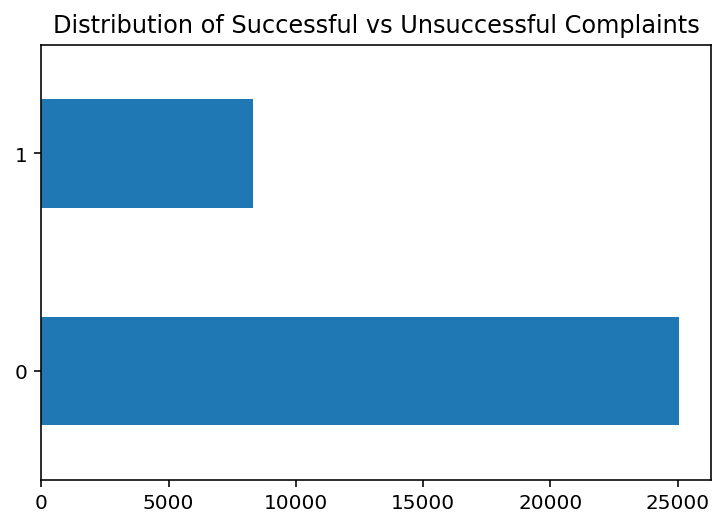

In [ ]:
# Creating plot of distribution of the number of complaints by success.
cleaned.success.value_counts().plot(x='success', y='first_name', kind='barh', title='Distribution of Successful vs Unsuccessful Complaints')

**Distribution of Complaints by Gender**

We wanted to take a look at the distribution of the complaints based on gender as gender is another significant factor in our overall question.

In [ ]:
# Finding distribution of the number of complaints by gender.
cleaned.complainant_gender.value_counts()

Male                     24058
Female                    5021
Not described               57
Transwoman (MTF)            20
Transman (FTM)               5
Gender non-conforming        2
Name: complainant_gender, dtype: int64

We created a horizontal bar chart to represent these distributions.

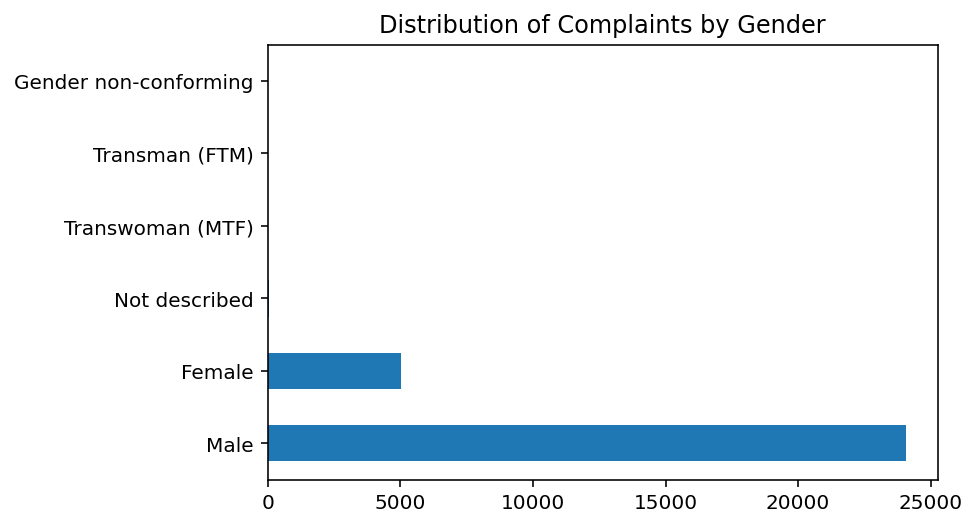

In [ ]:
# Creating plot of distritbution of the number of complaints by gender.
cleaned.complainant_gender.value_counts().plot(kind='barh', title='Distribution of Complaints by Gender')

**Gender Representation**
> 
We choose to represent Males and Transmen with 1 and Females and Transwomen with 0 while considering Not described and Gender non-conforming as null values. This is because we are specifically looking at the relationship between successful complaints of Men and Women.

In [ ]:
# Helper function to differentiate between males and females.
def m_or_w(x):
    if str(x) == 'Male':
        return 1
    elif str(x) == 'Transman (FTM)':
        return 1
    elif str(x) == 'Female':
        return 0
    elif str(x) == 'Transwoman (MTF)':
        return 0
    else:
        return np.NaN

In [ ]:
# Applying helper function to classify males and females.
cleaned['gender'] = cleaned.complainant_gender.apply(m_or_w)

**Distrbution of "Male" vs "Female" Complaints**

Similar to the earlier distribution of complaints by gender, except now we have classified the entries as male or female which is the central focus of our question.

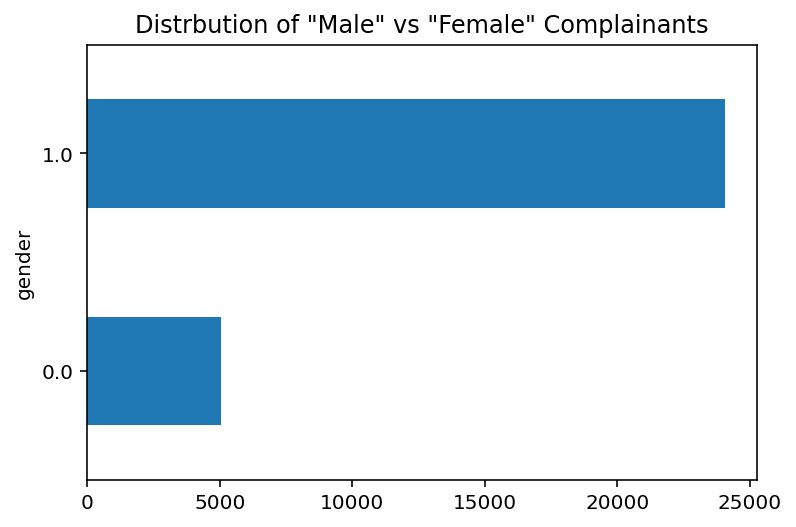

In [ ]:
# Creating plot of distribution between male and female complainants.
cleaned.groupby('gender').count()['first_name'].reset_index().plot(x='gender', kind='barh', title='Distrbution of "Male" vs "Female" Complainants', legend=False)

**Means of Gender column for Unsuccessful vs Successful Complaints**

Looking at the average success solely based on gender. This is relevant because the next step forward is to separate by allegation.

In [ ]:
# Grouping by success to see average success by gender.
cleaned.groupby('success').mean()['gender']

success
0    0.817510
1    0.855058
Name: gender, dtype: float64

**Means of Success column for Different Types of Allegations grouped by Gender**

Taking a look at the average success based on both allegation and gender as this is what our question focuses on.

In [ ]:
# Grouping by allegaton and gender to see average successes.
cleaned.groupby(['allegation', 'gender']).mean()['success']

allegation            gender
Action                0.0       0.261538
                      1.0       0.326446
Animal                1.0       0.000000
Body Cavity Searches  1.0       0.333333
Chokehold             0.0       0.166667
                                  ...   
Vehicle search        1.0       0.325282
Vehicle stop          0.0       0.114035
                      1.0       0.174717
Word                  0.0       0.185307
                      1.0       0.215479
Name: success, Length: 148, dtype: float64

Creating a better representation of the data above.

In [ ]:
# Creating pivot table separted by allegation with average successes of females and males.
cleaned.pivot_table(index='allegation', columns='gender', values='success', aggfunc='mean')

gender,0.0,1.0
allegation,,
Action,0.261538,0.326446
Animal,NaN,0.000000
Body Cavity Searches,NaN,0.333333
Chokehold,0.166667,0.181818
Curse,0.000000,NaN
...,...,...
Threat to notify ACS,0.250000,0.000000
Vehicle,NaN,0.228571
Vehicle search,0.254902,0.325282


Plotting a stacked bar chart to visualize the data above.

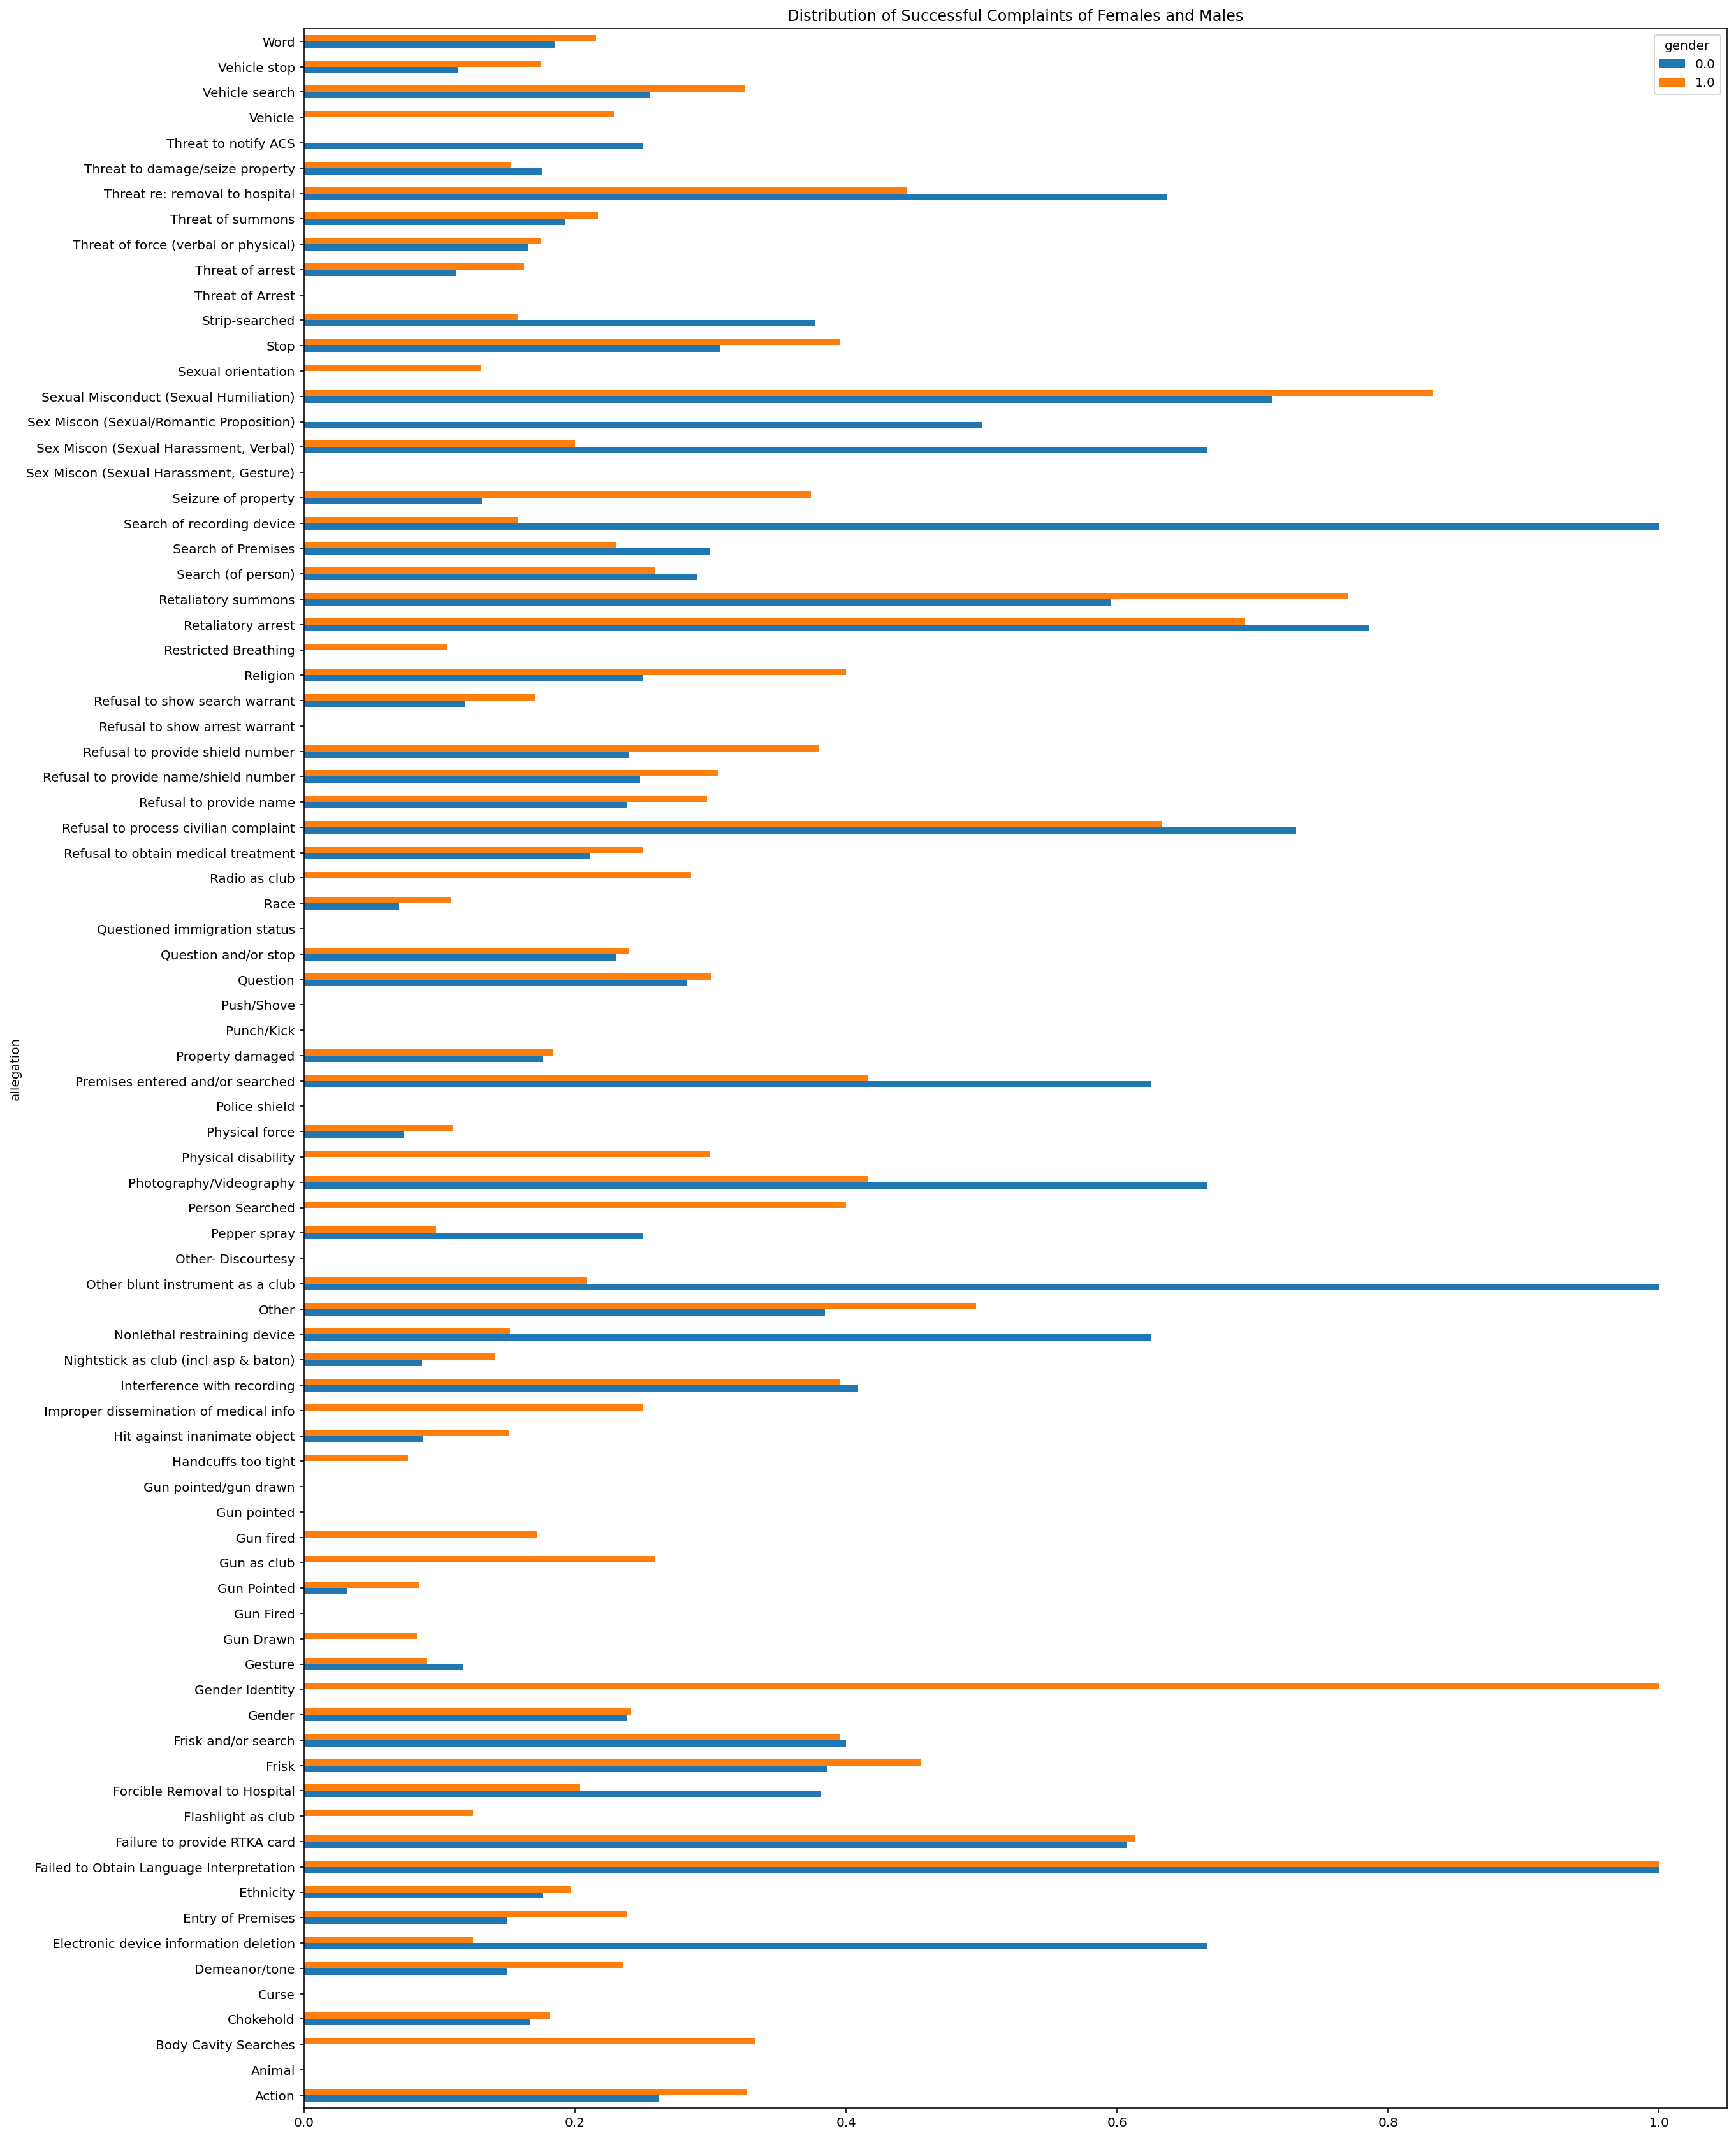

In [ ]:
# Creating plot displaying distribution of Successful complaints of females and males.
cleaned.pivot_table(index='allegation', columns='gender', values='success', aggfunc='mean').plot.barh(figsize=(20, 30), title='Distribution of Successful Complaints of Females and Males')

### Assessment of Missingness

Let's Begin by looking at the proportion of missing values per column:

In [ ]:
cleaned.isnull().sum() / len(cleaned)

unique_mos_id               0.000000
first_name                  0.000000
last_name                   0.000000
command_now                 0.000000
shield_no                   0.000000
complaint_id                0.000000
month_received              0.000000
year_received               0.000000
month_closed                0.000000
year_closed                 0.000000
command_at_incident         0.046286
rank_abbrev_incident        0.000000
rank_abbrev_now             0.000000
rank_now                    0.000000
rank_incident               0.000000
mos_ethnicity               0.000000
mos_gender                  0.000000
mos_age_incident            0.000000
complainant_ethnicity       0.165028
complainant_gender          0.125757
complainant_age_incident    0.144253
fado_type                   0.000000
allegation                  0.000030
precinct                    0.000719
contact_reason              0.005966
outcome_description         0.001679
board_disposition           0.000000
d

It appears that complainant gender has many missing values, so we would like to use this column to compare the missingness dependent on other columns, as this column is related to our question.

Here, we observe the complainant gender column, and create a new gender_isnull column to help us compare this column to other columns, and checking for any possible dependence.

In [ ]:
cleaned['gender_isnull'] = cleaned.complainant_gender.isnull()
cleaned['gender_isnull'].value_counts(normalize=True)

False    0.874243
True     0.125757
Name: gender_isnull, dtype: float64

We plot a Kernel Density Estimation so that we can see the data in a better way and make our decision on what test statistic to use.

gender_isnull
False    AxesSubplot(0.125,0.125;0.775x0.755)
True     AxesSubplot(0.125,0.125;0.775x0.755)
Name: mos_age_incident, dtype: object

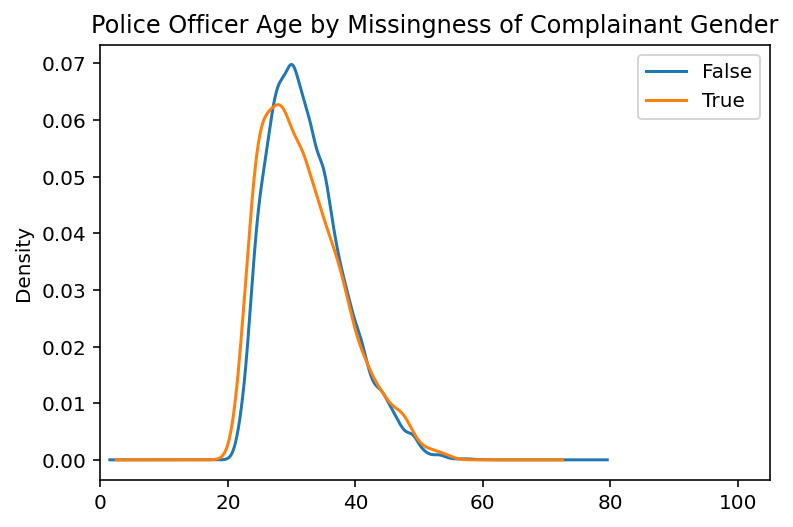

In [ ]:
# Creating plot to check which test statistic is best for this case.
cleaned.groupby('gender_isnull').mos_age_incident.plot(kind='kde', legend=True, title="Police Officer Age by Missingness of Complainant Gender", xlim=(0, 105))

In the plot above, we see that the distribution of Complainant Age by the Missingness of the Complainant Gender column appear to have similar means by the naked eye; but to be sure of this, we will run a Permutation Test using the Kolmogorov-Smirnov Test Statistic to find the difference between both. 

Helper functions used for permutation tests.

In [ ]:
def permutation_test(data, col, group_col, test_statistic, N=1000):
    # get the observed test statistic
    obs = test_statistic(data, col, group_col)

    # run the permutations
    shuffled_stats = []
    for _ in range(N):

        shuffled = data[group_col].sample(
            frac=1, replace=False).reset_index(drop=True)
        with_shuffled = data[[col]].assign(shuffled=shuffled)
        shuffled_stat = test_statistic(with_shuffled, col, 'shuffled')
        shuffled_stats.append(shuffled_stat)

    shuffled_stats = np.array(shuffled_stats)

    return shuffled_stats, obs

def tvd(data, col, group_col):
    """tvd of the distribution of values in col
    bewteen the two groups of group_col. col is
    assumed to be categorical."""

    tvd = (
        data
        .pivot_table(
            index=col,
            columns=group_col,
            aggfunc='size',
            fill_value=0
        )
        .apply(lambda x: x / x.sum())
        .diff(axis=1).iloc[:, -1].abs().sum() / 2
    )

    return tvd

def ks(data, col, group_col):
    """tvd of the distribution of values in col
    bewteen the two groups of group_col. col is
    assumed to be categorical."""

    from scipy.stats import ks_2samp

    # should have only two values in column
    valA, valB = data[group_col].unique()
    ks, _ = ks_2samp(
        data.loc[data[group_col] == valA, col],
        data.loc[data[group_col] == valB, col]
    )

    return ks

Perform permutation test to evaluate missingness.

Observed Test Statistic: 0.0710539915857428
P-Value: 0.0



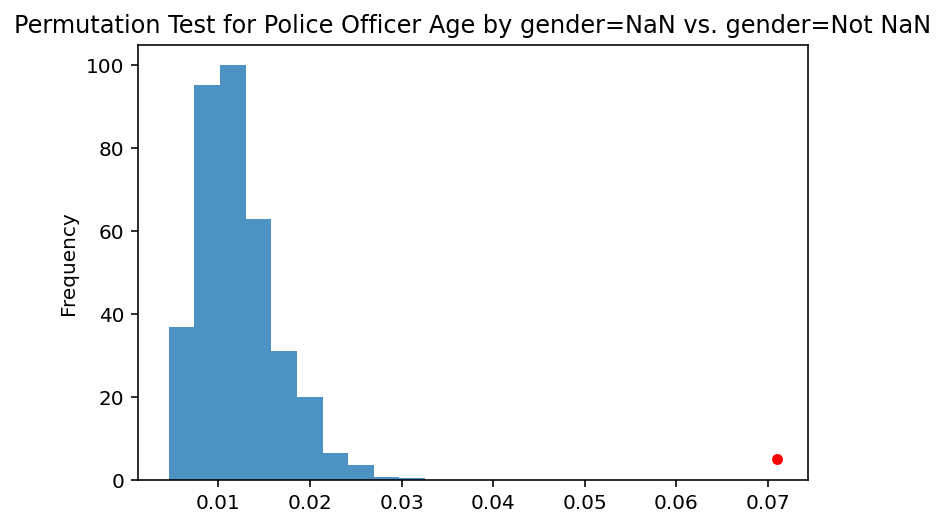

In [ ]:
distr, obs = permutation_test(cleaned, 'mos_age_incident', 'gender_isnull', ks)
pval = (distr >= obs).mean()
print("Observed Test Statistic: " + str(obs))
print("P-Value: " + str(pval) + "\n")
pd.Series(distr).plot(kind='hist',density=True, alpha=0.8, title='Permutation Test for Police Officer Age by gender=NaN vs. gender=Not NaN')
plt.scatter(obs, 5, color='r', s=20, zorder=10)

By using a Significance Level of 0.05, with the results above, it is clear that it is very rare that we see such a huge observed difference, compared to the permuted test statistics. Therefore, we can say that we REJECT the Null that Police Officer Age & Complainant Gender come from the same distribution. 
> 

So, this leads us to believe that Complainant Gender is Missing at Random (MAR) dependent on Police Officer Age.

Now, let's take a look at the distribution of Successful Complaints by the Missingness of Complainant Gender:

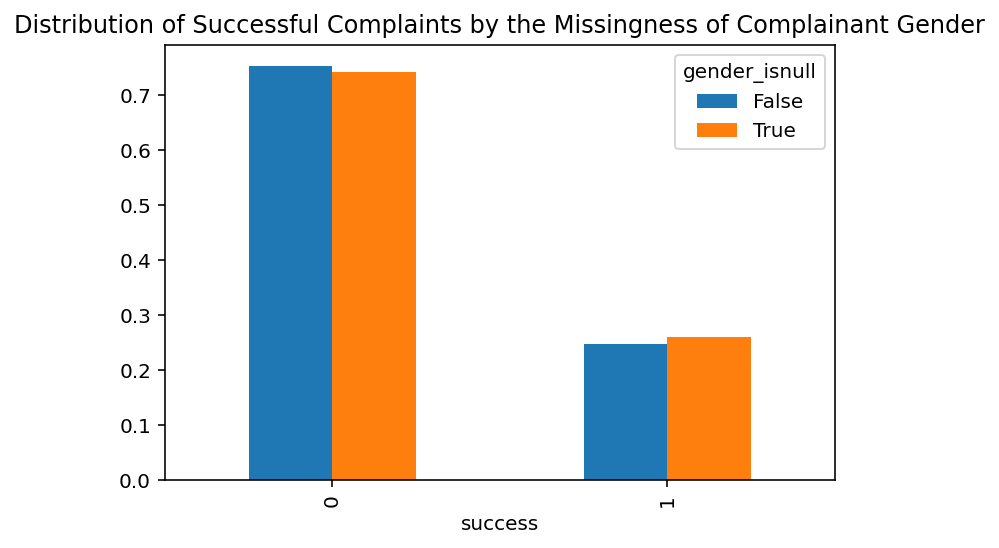

In [ ]:
distr = cleaned.pivot_table(columns='gender_isnull', index='success', aggfunc='size').fillna(0).apply(lambda x:x / x.sum())
distr.plot(kind='bar', title='Distribution of Successful Complaints by the Missingness of Complainant Gender')

By the naked eye in the plot above, we can see that there is hardly any difference between gender missingness per successful complaints or not successful complaints.
> 
To be sure of this, we use the Total Variation Distance (TVD) Test Statistic to quantify the total difference between missingness:

Observed Test Statistic: 0.012295095132749623
P-Value: 0.074



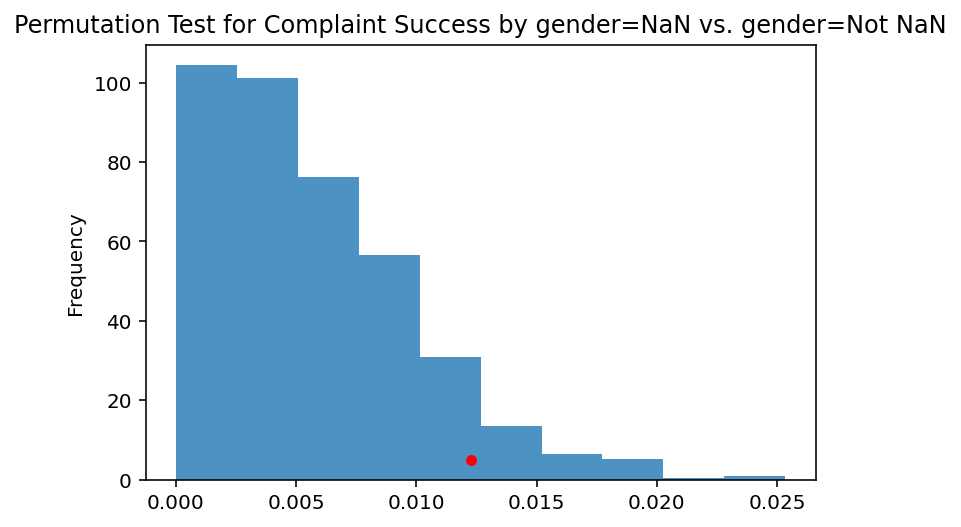

In [ ]:
distr, obs = permutation_test(cleaned, 'success', 'gender_isnull', tvd)
pval = (distr >= obs).mean()
print("Observed Test Statistic: " + str(obs))
print("P-Value: " + str(pval) + "\n")
pd.Series(distr).plot(kind='hist',density=True, alpha=0.8, title='Permutation Test for Complaint Success by gender=NaN vs. gender=Not NaN')
plt.scatter(obs, 5, color='r', s=20, zorder=10)

By using a Significance Level of 0.05, in the visual above, we can see that 
it is not as rare that we see such an observed difference, compared to the permuted test statistics. Therefore, we can say that we DO NOT REJECT the Null that Complaint Success & Complainant Gender come from the same distribution.


### Hypothesis Test

For our Hypothesis Test, we chose to evaluate the question of whether or not the complaints of women are more successful than those of men (for the same allegations). 

Our Null Hypothesis is that the complaints of women and men are equally successful while the Alternate Hypothesis is that the complaints of women are more successful than those of men.

The test statistic we chose for this test was the signed total variation distance for different allegations. We did this by assigning all values in the "Board Disposition" column that were "Substantiated" as 1 and all others as 0 where 1 represents a successful complaint and 0 represents an unsuccessful one. Then, we split up the average successes for each allegation and each gender and found the signed total variation distance with those values.

We chose to use a significance level of 0.05 and this is a good choice because it gives us a high level of confidence that the results of our test are meaningful.



Using the pivot table we made earlier, we drop any rows with null values as it would ruin our test to include them since there is no reaonable substitute for null values. This is because, in this case, null values indicate that there were no complaints made by that gender for that allegation so we can not compare values. Also, we are only dropping 16 rows, so we decided that this was a good decision as it is better to get rid of these values that could negatively affect our results and we are not getting rid of a signficant amount of the data.

In [ ]:
# Creating pivot table with average of "success" column as values.
pt = cleaned.pivot_table(index='allegation', columns='gender', values='success', aggfunc='mean')
# Dropping any rows with null values.
no_null = pt.dropna()
no_null.head()

gender,0.0,1.0
allegation,,
Action,0.261538,0.326446
Chokehold,0.166667,0.181818
Demeanor/tone,0.150000,0.235294
Electronic device information deletion,0.666667,0.125000
Entry of Premises,0.150000,0.238095


Here we are calculating our observed test statistic by taking the signed total variaton distance.

In [ ]:
# Calculating the Signed Total Variation Distance
observed = np.sum(no_null[0.0] - no_null[1.0]) / 2
observed

0.18044869175244838

We wanted to make sure that when we were sampling in the permutation test, we were only using the rows in which the allegations matched up with the non_null pivot table.

In [ ]:
alls = list(no_null.index)
# Finding all rows that have an allegation that is in the non_null pivot table.
to_sample = cleaned[cleaned['allegation'].isin(alls)]
to_sample = to_sample.reset_index(drop=True)

Permutation test with 1000 repetitions, sampling without replacement from the gender column so that we can simulate the values under the Null Hypothesis.

In [ ]:
tvds = []
for _ in range(1000):
    # Creating a simulated column using the values in the original "gender" column
    s = to_sample['gender'].sample(replace=False, frac=1).reset_index(drop=True)
    to_sample['gender'] = s
    sampled_pt = to_sample.pivot_table(index='allegation', columns='gender', values='success', aggfunc='mean')
    tvds.append(np.sum(sampled_pt[0.0] - sampled_pt[1.0]) / 2)

In [ ]:
pval = (tvds >= observed).sum() / 1000
pval

0.365

Through our permutation test with 1000 repetitions, we obtain a p-value of 0.394. Since 0.394 > 0.05, we fail to reject the Null Hypothesis. This indicates that with our dataset, it is likely that the complaints of women and men share similar rates of success.